<a href="https://colab.research.google.com/github/heartke/colab/blob/master/%E8%B6%85%E5%8F%82%E6%95%B0%E4%B8%8E%E6%A8%A1%E5%9E%8B%E9%AA%8C%E8%AF%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [0]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

以上对模型的评估是不好的，因为将训练集作为测试集来使用是对模型的评估不准确的

In [5]:
from sklearn.model_selection import train_test_split
# 每个分一半数据
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, 
                                                train_size=0.5)
# 用模型拟合训练数据
model.fit(Xtrain, ytrain)
# 在测试集中评估模型准确率
y2_model = model.predict(Xtest)
accuracy_score(ytest, y2_model)

0.9066666666666666

In [6]:
y2_model = model.fit(Xtrain, ytrain).predict(Xtest)
y1_model = model.fit(Xtest, ytest).predict(Xtrain)
accuracy_score(ytrain, y1_model), accuracy_score(ytest, y2_model)

(0.96, 0.9066666666666666)

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [8]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
scores.mean()

0.96

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynmialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                      LinearRegression(**kwargs))

In [0]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
  # 随机抽样数据
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y
X, y = make_data(40)

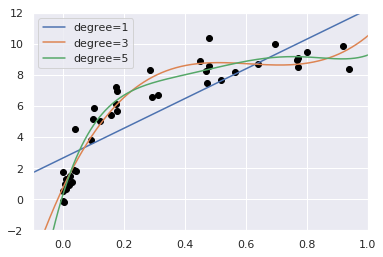

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置图形样式

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
  y_test = PolynmialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Text(0, 0.5, 'score')

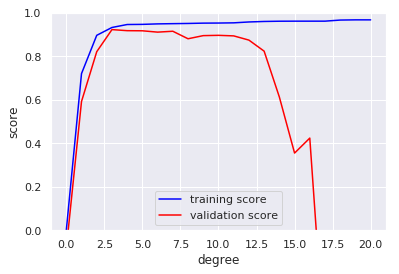

In [13]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynmialRegression(), X, y,
                                          'polynomialfeatures__degree', 
                                          degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

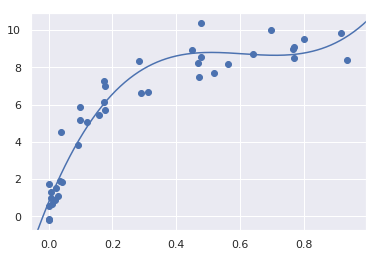

In [14]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynmialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim)

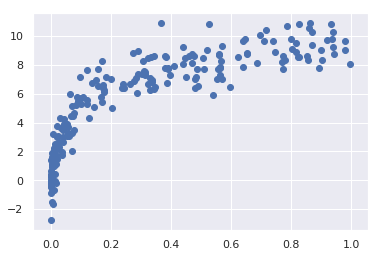

In [15]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

Text(0, 0.5, 'score')

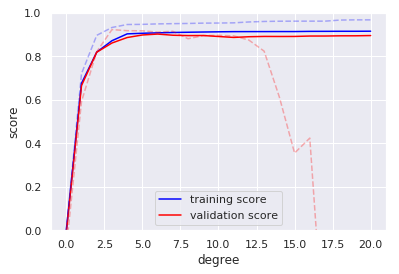

In [16]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynmialRegression(), X2, y2, 
                                            'polynomialfeatures__degree', 
                                            degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue',
        label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', 
        label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
        linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
        linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')


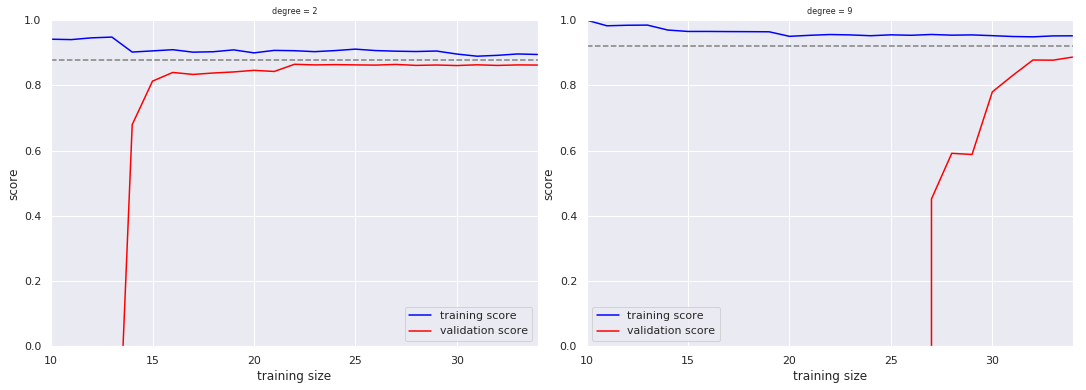

In [17]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
  N, train_lc, val_lc = learning_curve(PolynmialRegression(degree),
                                       X, y, cv=7,
                                       train_sizes=np.linspace(0.3, 1, 25))
  ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
  ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
  ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
              linestyle='dashed')
  
  ax[i].set_ylim(0, 1)
  ax[i].set_xlim(N[0], N[-1])
  ax[i].set_xlabel('training size')
  ax[i].set_ylabel('score')
  ax[i].set_title('degree = {0}'.format(degree), size=8)
  ax[i].legend(loc='best')

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':np.arange(21),
             'linearregression__fit_intercept':[True, False],
             'linearregression__normalize':[True, False]}
grid = GridSearchCV(PolynmialRegression(), param_grid, cv=7)

In [19]:
grid.fit(X, y);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

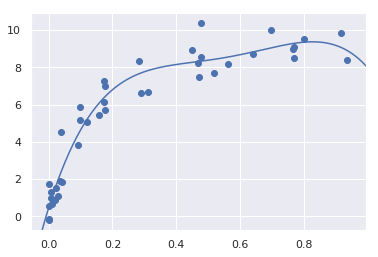

In [21]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);